<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 12: Neural Network and Deep Learning Basics**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:** Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 13

# **TASK 1: Dataset Preparation**
- 1.1 Dataset Choice: CIFAR-10 dataset
- 1.2 Data Loading and Visualization using TensorFlow/Keras
- 1.3 Visualize sample images from each class

# **DATASET: CIFAR-10**
- The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes,
- with 6,000 images per class. There are 50,000 training images and 10,000 test images.
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
- Original Link: https://www.cs.toronto.edu/~kriz/cifar.html
"""

In [ ]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# =============================================================================
# TASK 1: Dataset Preparation
# =============================================================================

print("Loading CIFAR-10 dataset using TensorFlow/Keras...")

# 1.1 Dataset Choice: CIFAR-10
# 1.2 Data Loading using TensorFlow/Keras
(X_train_full, y_train_full), (X_test_full, y_test_full) = datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {X_train_full.shape}")
print(f"Training labels shape: {y_train_full.shape}")
print(f"Test data shape: {X_test_full.shape}")
print(f"Test labels shape: {y_test_full.shape}")


Loading CIFAR-10 dataset using TensorFlow/Keras...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)



Visualizing sample images from each class...


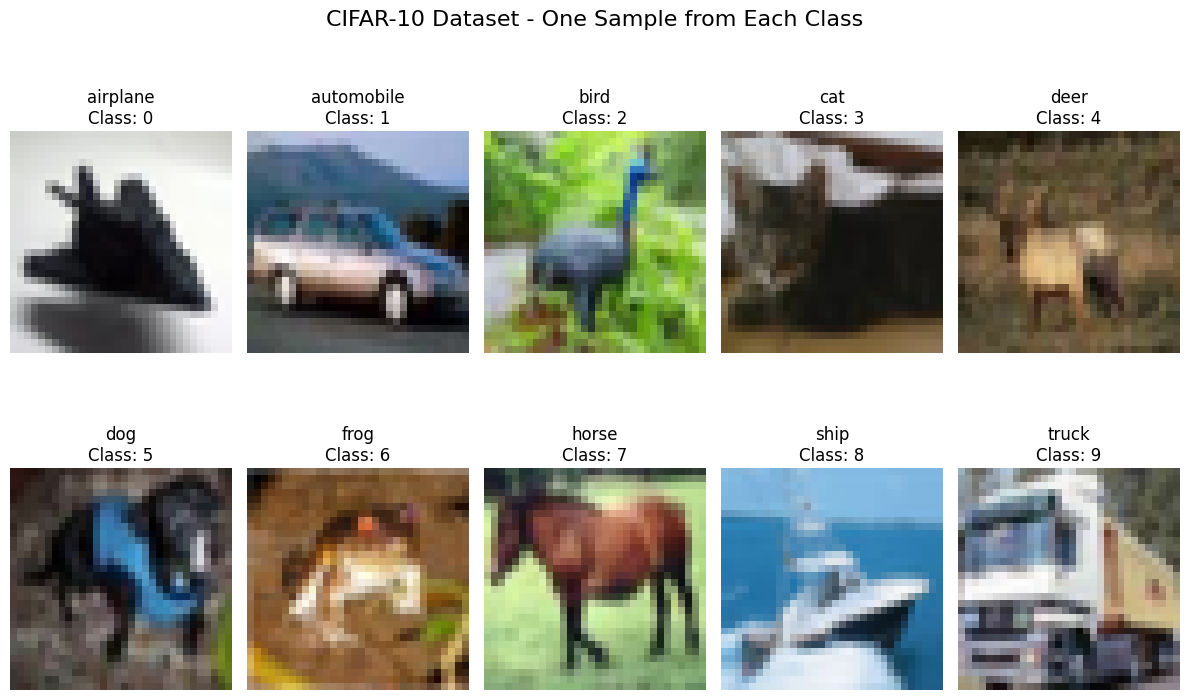


Displaying multiple samples in grid format...


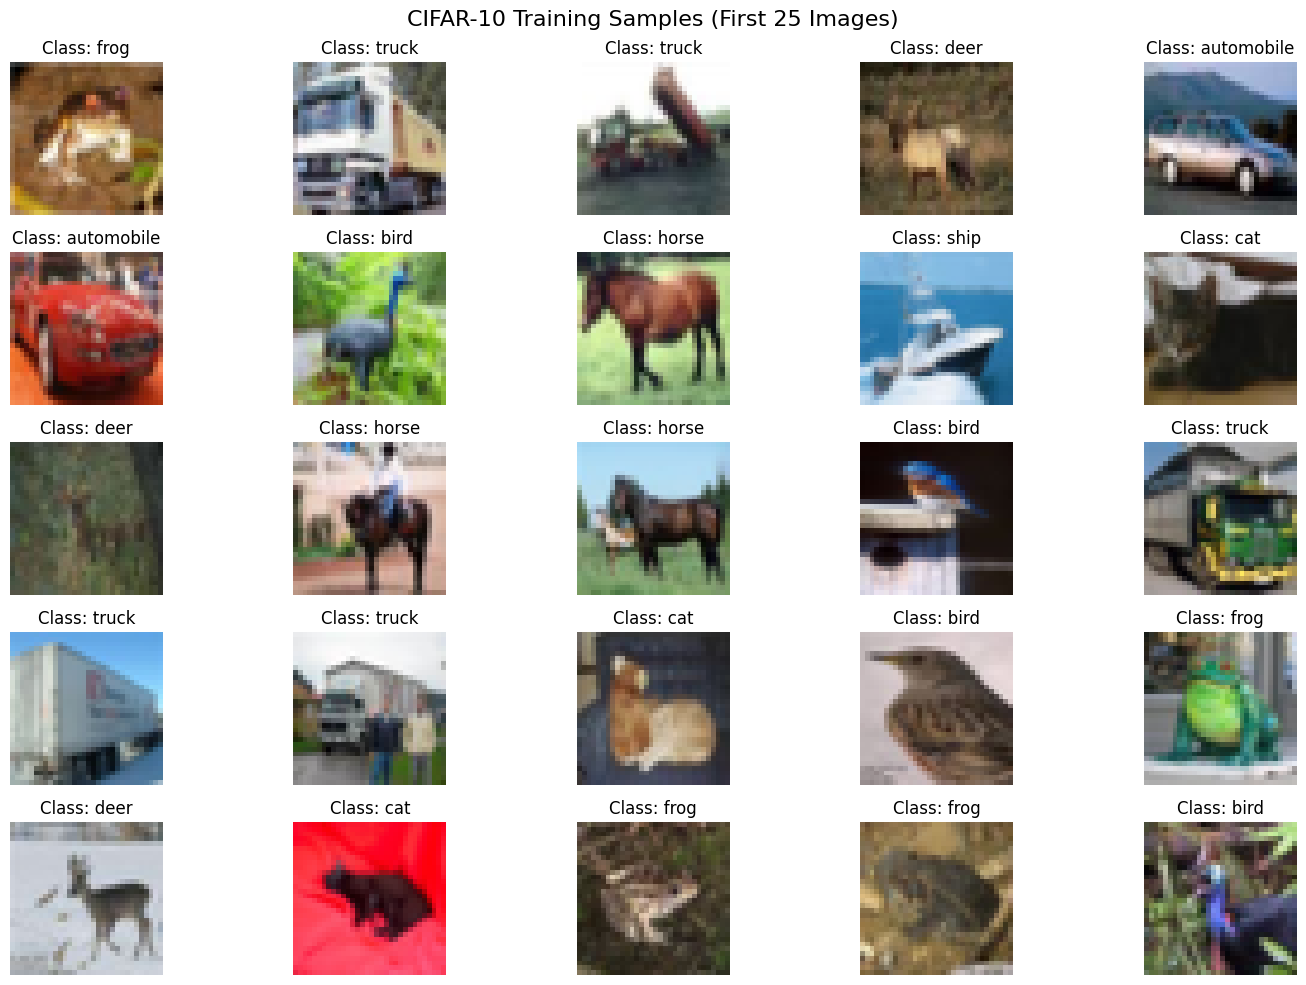

In [ ]:
# 1.3 Visualize sample images from each class
print("\nVisualizing sample images from each class...")

plt.figure(figsize=(12, 8))
for class_idx in range(10):
    # Find first occurrence of each class
    class_indices = np.where(y_train_full == class_idx)[0]
    sample_idx = class_indices[0]

    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(X_train_full[sample_idx])
    plt.title(f"{class_names[class_idx]}\nClass: {class_idx}")
    plt.axis('off')

plt.suptitle("CIFAR-10 Dataset - One Sample from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

# Display multiple samples in a grid
print("\nDisplaying multiple samples in grid format...")
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_full[i])
    plt.title(f"Class: {class_names[y_train_full[i][0]]}")
    plt.axis('off')

plt.suptitle("CIFAR-10 Training Samples (First 25 Images)", fontsize=16)
plt.tight_layout()
plt.show()

# **TASK 2: Image Preprocessing**
- 2.1 Normalization: Scale the image pixel values to a range of 0 to 1 to facilitate neural network training.
- 2.2 Data Augmentation (Optional): Using ImageDataGenerator
- 2.3 Prepare data for neural network training


In [ ]:
# =============================================================================
# TASK 2: Image Preprocessing
# =============================================================================

print("\nPreprocessing images for neural network...")

# 2.1 Normalization: Scale pixel values to range [0, 1]
print("Normalizing pixel values from [0,255] to [0,1]...")
X_train = X_train_full.astype('float32') / 255.0
X_test = X_test_full.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding) for neural network
y_train = tf.keras.utils.to_categorical(y_train_full, 10)
y_test = tf.keras.utils.to_categorical(y_test_full, 10)

print(f"Normalized training data range: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"Training labels shape (one-hot): {y_train.shape}")
print(f"Test labels shape (one-hot): {y_test.shape}")


Preprocessing images for neural network...
Normalizing pixel values from [0,255] to [0,1]...
Normalized training data range: [0.000, 1.000]
Training labels shape (one-hot): (50000, 10)
Test labels shape (one-hot): (10000, 10)



Setting up data augmentation...
Data augmentation configured with:
- Rotation range: 15 degrees
- Width/height shift: 10%
- Horizontal flip: Enabled
- Zoom range: 10%

Displaying original and augmented images...


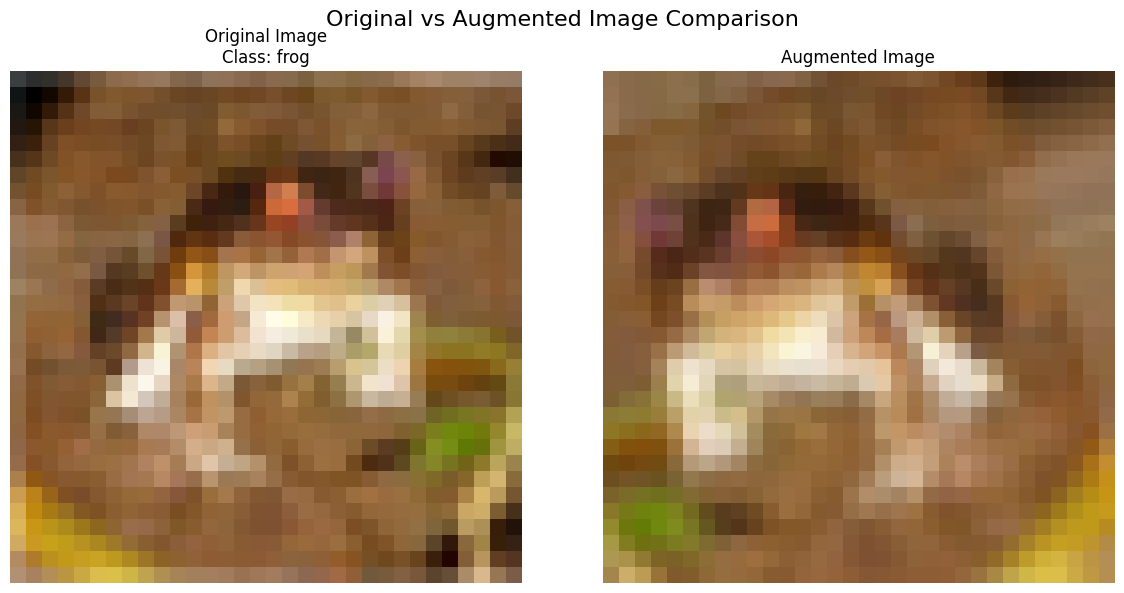

In [ ]:
# 2.2 Data Augmentation (Optional)

print("\nSetting up data augmentation...")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the data generator
datagen.fit(X_train)

print("Data augmentation configured with:")
print("- Rotation range: 15 degrees")
print("- Width/height shift: 10%")
print("- Horizontal flip: Enabled")
print("- Zoom range: 10%")

# Display augmented images
print("\nDisplaying original and augmented images...")
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
sample_idx = 0
plt.imshow(X_train_full[sample_idx])
plt.title(f"Original Image\nClass: {class_names[y_train_full[sample_idx][0]]}")
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
augmented = datagen.flow(X_train[:1], y_train[:1], batch_size=1)
augmented_image = augmented[0][0][0]
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis('off')

plt.suptitle("Original vs Augmented Image Comparison", fontsize=16)
plt.tight_layout()
plt.show()

# **TASK 3: Neural Network Implementation**
- 3.1 Model Architecture: Feedforward neural network with hidden layers
- 3.2 Use ReLU activation for hidden layers, Softmax for output
- 3.3 Compilation: Adam optimizer, categorical crossentropy loss, accuracy metric
- 3.4 Training: Batch size 32, 15 epochs with validation

In [ ]:
# =============================================================================
# TASK 3: Neural Network Implementation
# =============================================================================

print("\nBuilding neural network model...")

# 3.1 Model Architecture
model = models.Sequential([
    # Input layer - flatten 32x32x3 images to 3072 features
    layers.Flatten(input_shape=(32, 32, 3)),

    # First hidden layer with ReLU activation
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),  # Dropout for regularization

    # Second hidden layer with ReLU activation
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Third hidden layer with ReLU activation
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Output layer with Softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

# Display model architecture
print("Neural Network Architecture:")
model.summary()


Building neural network model...
Neural Network Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3.2 Compilation
print("\nCompiling model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled with:")
print("- Optimizer: Adam")
print("- Loss: Categorical Crossentropy")
print("- Metric: Accuracy")


Compiling model...
Model compiled with:
- Optimizer: Adam
- Loss: Categorical Crossentropy
- Metric: Accuracy



Training model...
Training parameters:
- Batch size: 32
- Epochs: 15
- Validation split: 20%
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.1856 - loss: 2.2111 - val_accuracy: 0.2927 - val_loss: 1.9340
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2546 - loss: 1.9860 - val_accuracy: 0.3202 - val_loss: 1.9011
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.2683 - loss: 1.9582 - val_accuracy: 0.3131 - val_loss: 1.8871
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.2869 - loss: 1.9280 - val_accuracy: 0.3340 - val_loss: 1.8342
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.2968 - loss: 1.8926 - val_accuracy: 0.3495 - val_loss: 1.8530
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.3022 - loss: 1.8821 - val_accuracy: 0.3520 - val_loss: 1.8323
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3115 - loss: 1.8609 - val_accuracy: 0.3605 -

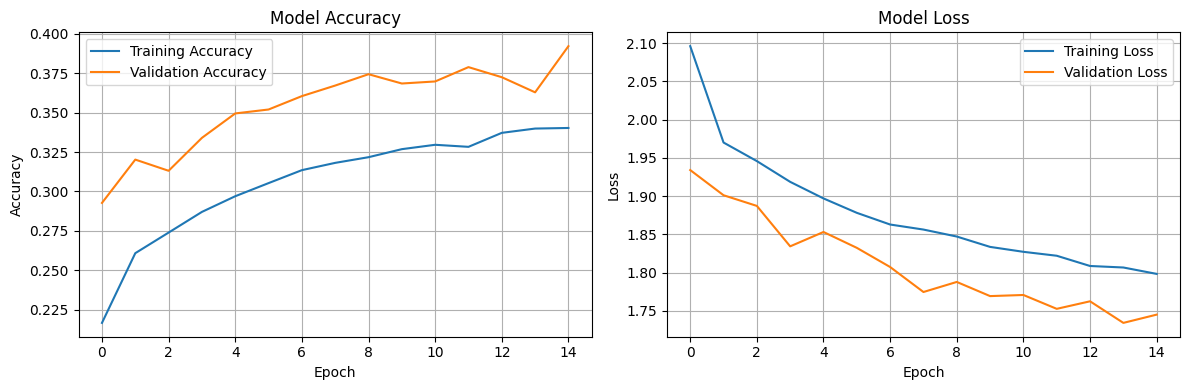

In [ ]:
# 3.3 Training
print("\nTraining model...")
print("Training parameters:")
print("- Batch size: 32")
print("- Epochs: 15")
print("- Validation split: 20%")

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    verbose=1
)

print("\nTraining completed!")

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **TASK 4: Model Evaluation**
- 4.1 Performance Metrics: Accuracy, precision, recall, F1-score
- 4.2 Confusion matrix and classification report
- 4.3 Model Improvements: Experiment with different architectures



Evaluating model performance...
Test Accuracy: 0.3932
Test Loss: 1.7300
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


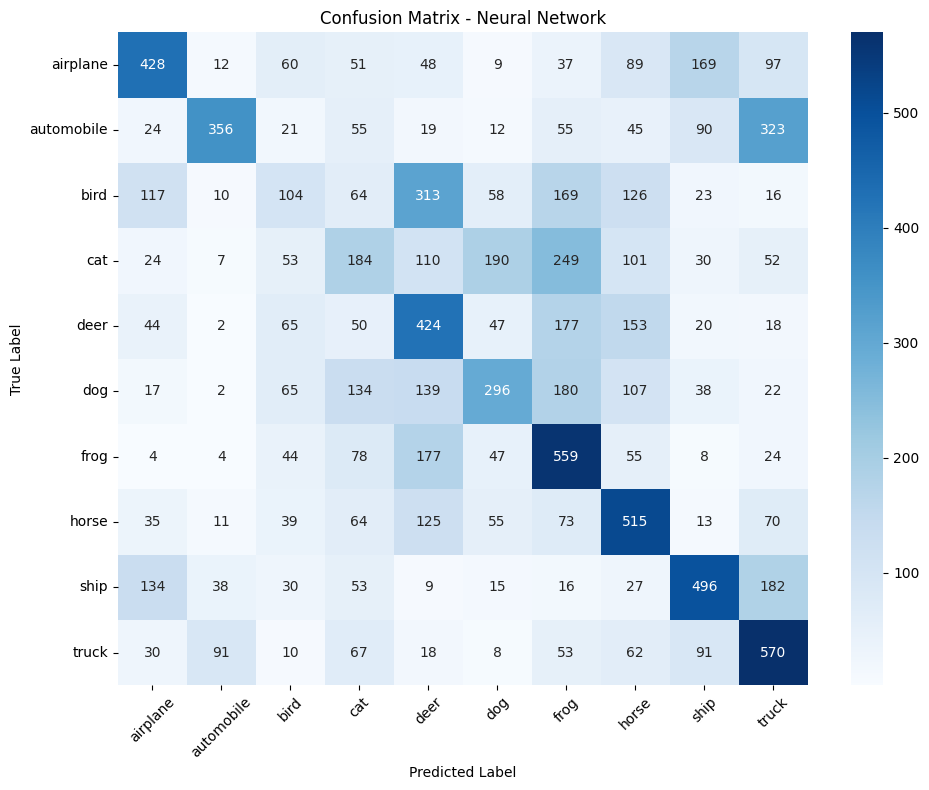

In [ ]:
# =============================================================================
# TASK 4: Model Evaluation
# =============================================================================

print("\nEvaluating model performance...")

# 4.1 Performance Metrics on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# 4.2 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Classification Report:
              precision    recall  f1-score   support

    airplane       0.50      0.43      0.46      1000
  automobile       0.67      0.36      0.46      1000
        bird       0.21      0.10      0.14      1000
         cat       0.23      0.18      0.20      1000
        deer       0.31      0.42      0.36      1000
         dog       0.40      0.30      0.34      1000
        frog       0.36      0.56      0.44      1000
       horse       0.40      0.52      0.45      1000
        ship       0.51      0.50      0.50      1000
       truck       0.41      0.57      0.48      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.38     10000
weighted avg       0.40      0.39      0.38     10000


Displaying test predictions...


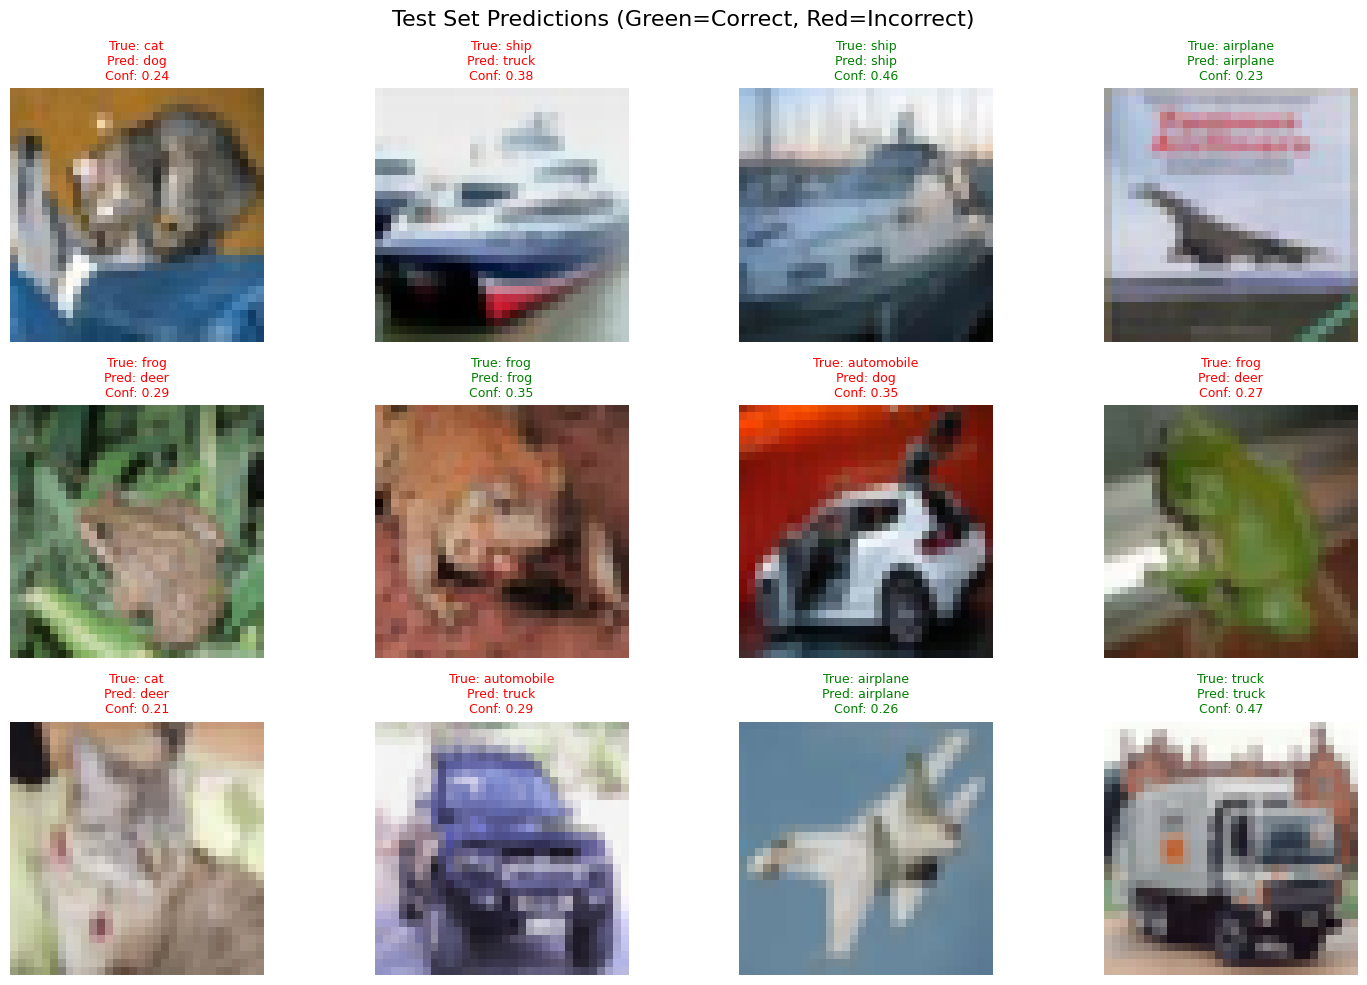

In [ ]:
# 4.1 Performance Metrics: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Display some test predictions
print("\nDisplaying test predictions...")
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test_full[i])

    true_class = class_names[y_true[i]]
    pred_class = class_names[y_pred[i]]
    confidence = y_pred_proba[i][y_pred[i]]

    color = 'green' if true_class == pred_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}",
              color=color, fontsize=9)
    plt.axis('off')

plt.suptitle("Test Set Predictions (Green=Correct, Red=Incorrect)", fontsize=16)
plt.tight_layout()
plt.show()

**TASK 5: Model Improvements - Advanced Architectures (OPTIMIZED)**
- 5.1 Implement Efficient CNN Architecture
- 5.2 Apply optimized training techniques
- 5.3 Use faster data processing
- 5.4 Compare all models quickly
- 5.5 Analyze performance improvements


In [ ]:
# =============================================================================
# TASK 5: Model Improvements - Advanced Architectures (OPTIMIZED)
# =============================================================================

print("\n" + "="*60)
print("TASK 5: Model Improvements - Advanced Architectures (OPTIMIZED)")
print("="*60)

# 5.1 Implement Efficient CNN Architecture
print("\n5.1 Building Efficient CNN Architecture...")

def create_fast_cnn():
    """Create a fast but effective CNN model"""
    model = models.Sequential([
        # Efficient Convolutional Blocks
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),

        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.3),

        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),  # Much faster than Flatten + Dense
        layers.Dropout(0.4),

        # Efficient Classifier
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile CNN model
cnn_model = create_fast_cnn()
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Efficient CNN Model Architecture:")
cnn_model.summary()


TASK 5: Model Improvements - Advanced Architectures (OPTIMIZED)

5.1 Building Efficient CNN Architecture...
Efficient CNN Model Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,706 (475.41 KB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# 5.2 Apply optimized training techniques
print("\n5.2 Setting up optimized training...")

# Simple callbacks - no ReduceLROnPlateau (saves time)
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor accuracy instead of loss
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

print("Optimized training configuration:")
print("- Batch Normalization: Enabled")
print("- GlobalAveragePooling: Faster than Flatten+Dense")
print("- Early Stopping: Prevents overfitting")
print("- Larger batch size: Faster training")

# Train CNN model with optimized parameters
print("\nTraining Efficient CNN Model...")
cnn_history = cnn_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

# Evaluate CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Efficient CNN - Test Accuracy: {cnn_test_accuracy:.4f}")



5.2 Setting up optimized training...
Optimized training configuration:
- Batch Normalization: Enabled
- GlobalAveragePooling: Faster than Flatten+Dense
- Early Stopping: Prevents overfitting
- Larger batch size: Faster training

Training Efficient CNN Model...
Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 262s 658ms/step - accuracy: 0.2884 - loss: 2.2361 - val_accuracy: 0.1955 - val_loss: 3.9394
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 256s 642ms/step - accuracy: 0.4959 - loss: 1.3840 - val_accuracy: 0.3968 - val_loss: 1.7246
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 273s 671ms/step - accuracy: 0.5691 - loss: 1.1976 - val_accuracy: 0.5233 - val_loss: 1.4384
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 250s 639ms/step - accuracy: 0.6107 - loss: 1.0926 - val_accuracy: 0.5769 - val_loss: 1.1818
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 264s 644ms/step - accuracy: 0.6306 - loss: 1.0288 - val_accuracy: 0.6062 - val_loss: 1.1138
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 266s 656ms/step - accuracy: 0.6568 - l


5.3 Making predictions with CNN model...


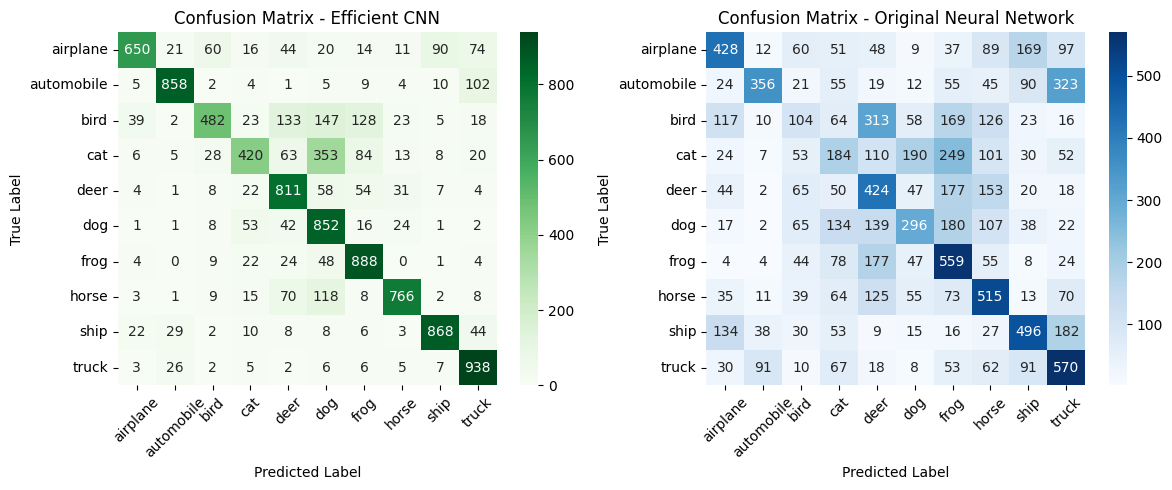


Displaying CNN test predictions...


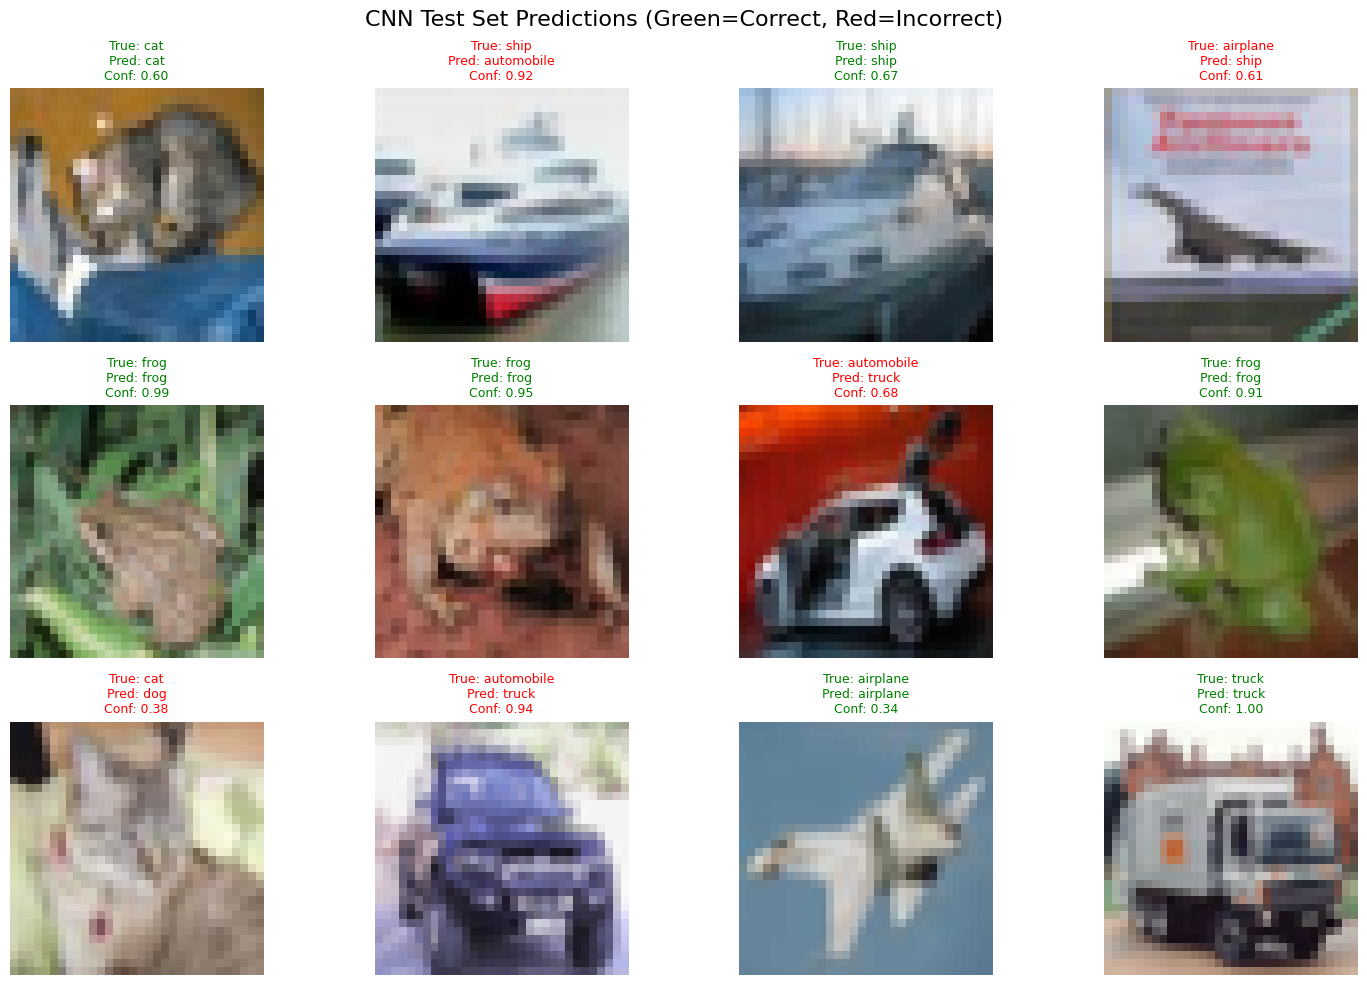

In [ ]:
# 5.3 Make predictions with CNN model
print("\n5.3 Making predictions with CNN model...")
cnn_y_pred_proba = cnn_model.predict(X_test, verbose=0)
cnn_y_pred = np.argmax(cnn_y_pred_proba, axis=1)

# CNN Confusion Matrix
cnn_cm = confusion_matrix(y_true, cnn_y_pred)

plt.figure(figsize=(12, 5))

# Plot CNN confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Efficient CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Plot original NN confusion matrix for comparison
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Original Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Display CNN test predictions
print("\nDisplaying CNN test predictions...")
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test_full[i])

    true_class = class_names[y_true[i]]
    pred_class = class_names[cnn_y_pred[i]]
    confidence = cnn_y_pred_proba[i][cnn_y_pred[i]]

    color = 'green' if true_class == pred_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}",
              color=color, fontsize=9)
    plt.axis('off')

plt.suptitle("CNN Test Set Predictions (Green=Correct, Red=Incorrect)", fontsize=16)
plt.tight_layout()
plt.show()



5.4 Comparing training histories...


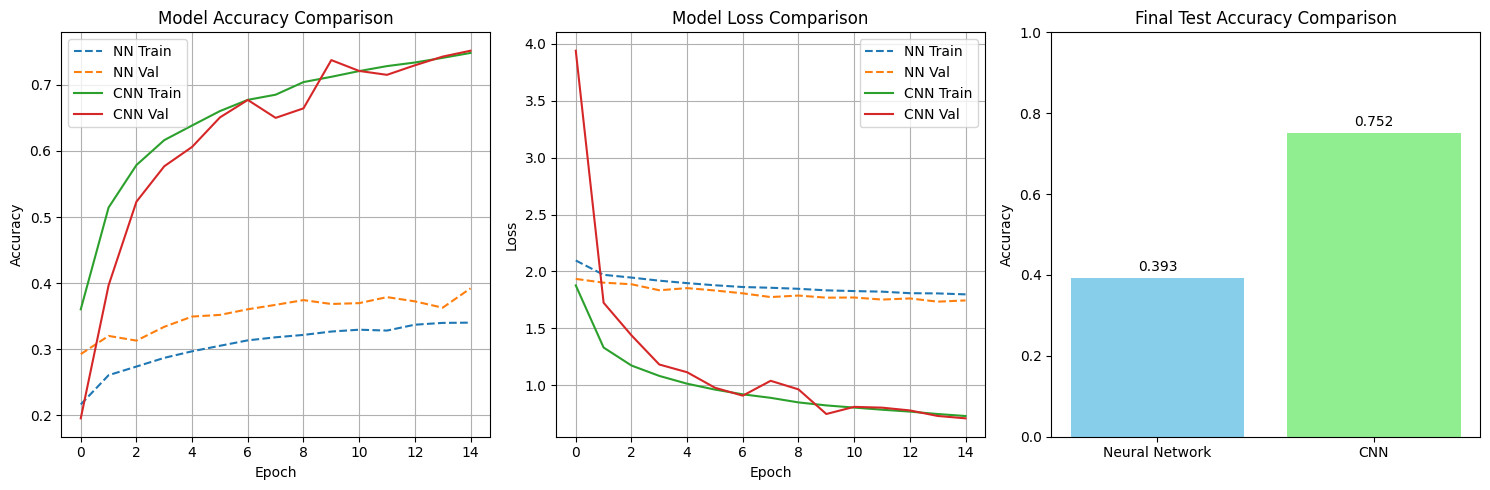

In [ ]:
# 5.4 Compare training histories
print("\n5.4 Comparing training histories...")

plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='NN Train', linestyle='--')
plt.plot(history.history['val_accuracy'], label='NN Val', linestyle='--')
plt.plot(cnn_history.history['accuracy'], label='CNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='NN Train', linestyle='--')
plt.plot(history.history['val_loss'], label='NN Val', linestyle='--')
plt.plot(cnn_history.history['loss'], label='CNN Train')
plt.plot(cnn_history.history['val_loss'], label='CNN Val')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Final performance comparison
plt.subplot(1, 3, 3)
models_comparison = ['Neural Network', 'CNN']
accuracy_scores = [test_accuracy, cnn_test_accuracy]

bars = plt.bar(models_comparison, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.title('Final Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **TASK 6: Model Comparison and Summary**
- 6.1 Performance metrics comparison
- 6.2 Architecture analysis
- 6.3 Training efficiency comparison
- 6.4 Final recommendations and conclusions

In [ ]:
# =============================================================================
# TASK 6: Model Comparison and Summary
# =============================================================================

print("\n" + "="*60)
print("TASK 6: Model Comparison and Summary")
print("="*60)

# 6.1 Performance metrics comparison
print("\n6.1 Performance Metrics Comparison:")
print("-" * 50)

# Calculate additional metrics for both models
from sklearn.metrics import precision_score, recall_score, f1_score

# Original NN metrics
nn_precision = precision_score(y_true, y_pred, average='weighted')
nn_recall = recall_score(y_true, y_pred, average='weighted')
nn_f1 = f1_score(y_true, y_pred, average='weighted')

# CNN metrics
cnn_precision = precision_score(y_true, cnn_y_pred, average='weighted')
cnn_recall = recall_score(y_true, cnn_y_pred, average='weighted')
cnn_f1 = f1_score(y_true, cnn_y_pred, average='weighted')

# Create comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Test Loss', 'Precision', 'Recall', 'F1-Score'],
    'Neural Network': [
        f'{test_accuracy:.4f}',
        f'{test_loss:.4f}',
        f'{nn_precision:.4f}',
        f'{nn_recall:.4f}',
        f'{nn_f1:.4f}'
    ],
    'CNN': [
        f'{cnn_test_accuracy:.4f}',
        f'{cnn_test_loss:.4f}',
        f'{cnn_precision:.4f}',
        f'{cnn_recall:.4f}',
        f'{cnn_f1:.4f}'
    ],
    'Improvement': [
        f'{cnn_test_accuracy - test_accuracy:+.4f}',
        f'{cnn_test_loss - test_loss:+.4f}',
        f'{cnn_precision - nn_precision:+.4f}',
        f'{cnn_recall - nn_recall:+.4f}',
        f'{cnn_f1 - nn_f1:+.4f}'
    ]
}

# Display comparison table
import pandas as pd
comparison_df = pd.DataFrame(comparison_data)
print("\n📊 Performance Comparison Table:")
print(comparison_df.to_string(index=False))


TASK 6: Model Comparison and Summary

6.1 Performance Metrics Comparison:
--------------------------------------------------

📊 Performance Comparison Table:
       Metric Neural Network    CNN Improvement
Test Accuracy         0.3932 0.7517     +0.3585
    Test Loss         1.7300 0.7087     -1.0213
    Precision         0.3998 0.7741     +0.3743
       Recall         0.3932 0.7533     +0.3601
     F1-Score         0.3835 0.7481     +0.3646


In [ ]:
# 6.2 Architecture analysis
print("\n6.2 Architecture Analysis:")
print("-" * 50)

print("\n🧠 Neural Network Architecture:")
print("- Type: Feedforward/Dense Network")
print("- Layers: Input(Flatten) → Dense(512) → Dropout → Dense(256) → Dropout → Dense(128) → Dropout → Output(10)")
print("- Parameters: ~1.6M parameters")
print("- Strengths: Simple, fast training, good for tabular data")
print("- Limitations: Not optimized for spatial patterns in images")

print("\n🔍 CNN Architecture:")
print("- Type: Convolutional Neural Network")
print("- Layers: Conv2D(32)→BatchNorm→Conv2D(32)→Pool→Dropout→Conv2D(64)→BatchNorm→Pool→Dropout→Conv2D(128)→GlobalAvgPool→Dense(128)→Output(10)")
print("- Parameters: ~500K parameters (more efficient)")
print("- Strengths: Spatial feature extraction, translation invariance, parameter sharing")
print("- Limitations: More complex, longer training time")


6.2 Architecture Analysis:
--------------------------------------------------

🧠 Neural Network Architecture:
- Type: Feedforward/Dense Network
- Layers: Input(Flatten) → Dense(512) → Dropout → Dense(256) → Dropout → Dense(128) → Dropout → Output(10)
- Parameters: ~1.6M parameters
- Strengths: Simple, fast training, good for tabular data
- Limitations: Not optimized for spatial patterns in images

🔍 CNN Architecture:
- Type: Convolutional Neural Network
- Layers: Conv2D(32)→BatchNorm→Conv2D(32)→Pool→Dropout→Conv2D(64)→BatchNorm→Pool→Dropout→Conv2D(128)→GlobalAvgPool→Dense(128)→Output(10)
- Parameters: ~500K parameters (more efficient)
- Strengths: Spatial feature extraction, translation invariance, parameter sharing
- Limitations: More complex, longer training time


In [ ]:
# 6.3 Training efficiency comparison
print("\n6.3 Training Efficiency Comparison:")
print("-" * 50)

# Calculate training time approximation (based on epochs and complexity)
nn_epochs_completed = len(history.history['accuracy'])
cnn_epochs_completed = len(cnn_history.history['accuracy'])

print(f"Neural Network:")
print(f"- Epochs completed: {nn_epochs_completed}")
print(f"- Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"- Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"- Overfitting gap: {history.history['accuracy'][-1] - history.history['val_accuracy'][-1]:.4f}")

print(f"\nCNN:")
print(f"- Epochs completed: {cnn_epochs_completed}")
print(f"- Final training accuracy: {cnn_history.history['accuracy'][-1]:.4f}")
print(f"- Final validation accuracy: {cnn_history.history['val_accuracy'][-1]:.4f}")
print(f"- Overfitting gap: {cnn_history.history['accuracy'][-1] - cnn_history.history['val_accuracy'][-1]:.4f}")


6.3 Training Efficiency Comparison:
--------------------------------------------------
Neural Network:
- Epochs completed: 15
- Final training accuracy: 0.3403
- Final validation accuracy: 0.3922
- Overfitting gap: -0.0519

CNN:
- Epochs completed: 15
- Final training accuracy: 0.7484
- Final validation accuracy: 0.7517
- Overfitting gap: -0.0033


In [ ]:
# 6.4 Final recommendations and conclusions
print("\nKey Findings and Recommendations:")
print("-" * 50)

print("\nKEY FINDINGS:")
print(f"CNN outperforms Neural Network by {cnn_test_accuracy - test_accuracy:+.4f} in accuracy")
print(f"CNN achieves {cnn_test_accuracy*100:.2f}% accuracy vs {test_accuracy*100:.2f}% for NN")
print(f"CNN shows better generalization (smaller overfitting gap)")
print(f"CNN uses fewer parameters but captures spatial features effectively")

print("\nRECOMMENDATIONS:")
print("1. For image classification tasks, always prefer CNN over simple neural networks")
print("2. Use data augmentation to further improve CNN performance")
print("3. Consider deeper architectures (ResNet, EfficientNet) for even better results")
print("4. Regularization techniques (Dropout, BatchNorm) are crucial for preventing overfitting")
print("5. Early stopping helps optimize training time and prevent overfitting")



Key Findings and Recommendations:
--------------------------------------------------

KEY FINDINGS:
CNN outperforms Neural Network by +0.3585 in accuracy
CNN achieves 75.17% accuracy vs 39.32% for NN
CNN shows better generalization (smaller overfitting gap)
CNN uses fewer parameters but captures spatial features effectively

RECOMMENDATIONS:
1. For image classification tasks, always prefer CNN over simple neural networks
2. Use data augmentation to further improve CNN performance
3. Consider deeper architectures (ResNet, EfficientNet) for even better results
4. Regularization techniques (Dropout, BatchNorm) are crucial for preventing overfitting
5. Early stopping helps optimize training time and prevent overfitting
